<a href="https://colab.research.google.com/github/raulec1982/-IBM-AI-Engineering-Certificado-profesional/blob/master/RSC__mia03_t5_tra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices
import numpy as np 
# Biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays
import matplotlib.pyplot as plt 
# Colección de algoritmos para el procesamiento de imágene
from skimage import data, color 
from skimage import util
plt.rcParams.update({'font.size': 14, 'font.family': 'serif'})

# 1. Función que afecta la imagen por ruido de tipo «sal y pimienta», y devuelve la imagen afectada por el ruido. 


In [0]:
def get_Noise_Image_Salt_Pepper(_image, _amount):
    image_gray = color.rgb2gray(_image) 
    # noise: Función para agregar ruido aleatorio de varios tipos a una imagen.
    # s&p: Ruido de tipo «sal y pimienta» Reemplaza píxeles aleatorios con 0 o 1.
    noise_image = util.random_noise(image_gray,mode='s&p',amount=_amount)                                                          
    figure, (plt_image_original, plt_image_gray, plt_noise_image)  = plt.subplots(ncols=3, figsize=(16,8), sharex=True, sharey = True)
    plt_image_original.set_title('Imagen original');
    plt_image_original.imshow(_image)
    plt_image_gray.set_title('Imagen gris');
    plt_image_gray.imshow(image_gray, cmap='gray')
    plt_noise_image.set_title('Imagen con ruido sal y pimienta');
    plt_noise_image.imshow(noise_image, cmap='gray')
    return noise_image

In [4]:
print("¿Ingrese el porcentaje de ruido?")
noise = float(int(input())/100)

¿Ingrese el porcentaje de ruido?
10


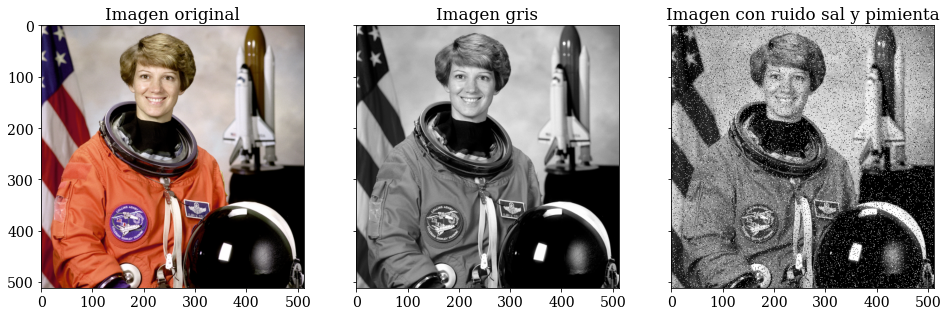

In [9]:
noise_image = get_Noise_Image_Salt_Pepper(data.astronaut(), noise)

# 2. Filtro adecuado para eliminar este tipo de ruido «sal y pimienta»

In [0]:
from skimage.filters.rank import median
from skimage.util import img_as_ubyte

In [0]:
def delete_Noise_Image_Salt_Pepper(_image):
  # median: El filtro medio para eliminar el ruido.
  # img_as_ubyte: Convierte una imagen a formato de byte sin signo.
  delete_noise_med = median(img_as_ubyte(_image))                                                   
  figure, image = plt.subplots(ncols=1, figsize=(8,6), sharex=True, sharey = True)
  image.set_title('Imagen sin ruido sal y pimienta');
  image.imshow(delete_noise_med, cmap='gray')
  return delete_noise_med;

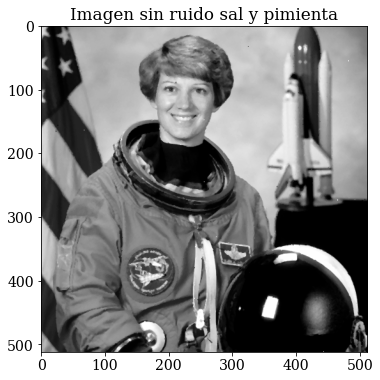

In [10]:
delete_noise_med = delete_Noise_Image_Salt_Pepper(noise_image)

#  3. Identificar las siluetas de las estructuras en ella presentes

In [0]:
from skimage import filters

In [0]:
def get_Edge_Detection(_image):
  # filters.roberts: El filtro Roberts se usa para detectar bordes 
  # en base a la aplicación de un filtro horizontal y vertical en secuencia. 
  # Ambos filtros se aplican a la imagen y se suman para formar el resultado final.  
  # El filtro Roberts pertenece a los llamados filtros de 
  # detección de bordes, es decir, filtros que puede usar para seleccionar 
  # solo los contornos de una imagen e ignorar todo lo demás.
  edge_roberts = filters.roberts(_image)
  # filters.sobel: El filtro Sobel es utilizado en procesamiento de imágenes, 
  # especialmente en algoritmos de detección de bordes. 
  # Técnicamente es un operador diferencial discreto que calcula una aproximación 
  # al gradiente de la función de intensidad de una imagen. 
  # Para cada punto de la imagen a procesar, el resultado del operador 
  # Sobel es tanto el vector gradiente correspondiente como la norma de éste vector.
  edge_sobel = filters.sobel(_image)
  figure, (plt_edge_sobel, plt_edge_roberts)  = plt.subplots(ncols=2, figsize=(12,8), sharex=True, sharey = True)
  plt_edge_sobel.set_title('Detección de bordes Sobel');
  plt_edge_sobel.imshow(edge_sobel, cmap='gray')
  plt_edge_roberts.set_title('Detección de bordes Roberts');
  plt_edge_roberts.imshow(edge_roberts, cmap='gray')

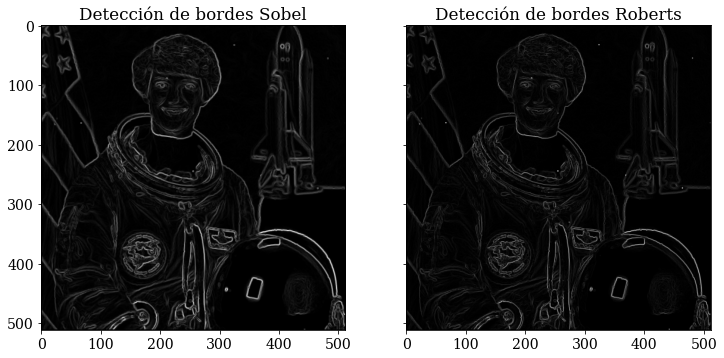

In [13]:
get_Edge_Detection(delete_noise_med)